# Proyek Analisis Data: Bike Sharing Dataset

1.   Item daftar
2.   Item daftar


- **Nama:** Melatie Raghyl Putri
- **Email:** melatieputri2003@gmail.com
- **ID Dicoding:** melatie_raghyl_putri

## Menentukan Pertanyaan Bisnis

- Pada bulan apa orang-orang paling banyak melakukan peminjaman? bulan tersebut pada season apa?
- Berapa persen perbandingan pengguna yang casual dengan yang terdaftar?
- Pada suhu berapa orang-orang banyak beraktivitas diluar?


## Import Semua Packages/Library yang Digunakan

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

NOTE:
1. Holiday: Nilai berupa biner, di mana 1 menunjukkan bahwa hari tersebut adalah hari libur, dan 0 menunjukkan bahwa itu bukan hari libur
2. Weekday: Hari dalam 1 minggu, 1 = senin, 2 = selasa, 3 = rabu, 4 = kamis, 5 = jumat, 6 = sabtu, 7 = minggu
3. Workingday: Nilai berupa biner, di mana 1 menunjukkan bahwa itu adalah hari kerja, dan 0 menunjukkan bahwa itu bukan hari kerja.
4. Season : musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
5. yr : tahun (0: 2011, 1: 2012)
6. bulan : bulan (1 sampai 12)
7. hr : jam (0 hingga 23)

In [38]:
#Load tabel hours
hour_df = pd.read_csv("https://raw.githubusercontent.com/Melatie017/dashboard/main/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [39]:
# memeriksa tipe data dari setiap kolom yang ada di tabel hour_df
hour_df.info()

#dari hasilnya dapat dilihat terdapat kesalahan pada datatype kolom dteday

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [40]:
#memeriksa jumlah duplikasi data yang ada
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [41]:
#melihat apakah ada data yang bernila Nan atau null
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [42]:
#menampilkan ringkasan parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [43]:
#mengubah tipe data kolom dteday pada tabel hour
datetime_columns = ["dteday"]

for column in datetime_columns:
 hour_df[column] = pd.to_datetime(hour_df[column])

In [44]:
#melakukan pemeriksaan ulang terhadap tipe data yg diubah
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [45]:
# Membuat kamus untuk melakukan mapping dari angka ke nama bulan
mapping_bulan = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}

hour_df['mnth'].replace(mapping_bulan, inplace=True)

In [46]:
# Membuat kamus untuk melakukan mapping dari angka ke nama season
mapping_season = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter',
}

hour_df['season'].replace(mapping_season, inplace=True)

In [47]:
# Membuat kamus untuk melakukan mapping dari angka ke tahun
mapping_yr = {
    0: '2011',
    1: '2012',
}

hour_df['yr'].replace(mapping_yr, inplace=True)

In [48]:
# Membuat kamus untuk melakukan mapping dari angka ke nama hari
mapping_weekday = {
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu',
}

hour_df['weekday'].replace(mapping_weekday, inplace=True)
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Januari,0,0,Sabtu,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Spring,2011,Januari,1,0,Sabtu,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Spring,2011,Januari,2,0,Sabtu,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Spring,2011,Januari,3,0,Sabtu,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Spring,2011,Januari,4,0,Sabtu,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,2012,Desember,19,0,Senin,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Spring,2012,Desember,20,0,Senin,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Spring,2012,Desember,21,0,Senin,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Spring,2012,Desember,22,0,Senin,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Exploratory Data Analysis (EDA)

### Explore Tabel Hour







In [50]:
#melihat rata-rata peminjam sepeda setiap bulan
bln = hour_df.groupby('mnth').cnt.mean()

# Menentukan urutan bulan
urutan_bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Mengurutkan data berdasarkan urutan bulan
bln = bln.reindex(index=urutan_bulan)
bln

mnth
Januari       94.424773
Februari     112.865026
Maret        155.410726
April        187.260960
Mei          222.907258
Juni         240.515278
Juli         231.819892
Agustus      238.097627
September    240.773138
Oktober      222.158511
November     177.335421
Desember     142.303439
Name: cnt, dtype: float64

In [53]:
#menambahkan kolom tanggal untuk meendapatkan data tgl yg terpisah dari kolom dteday
hour_df['tgl'] = hour_df['dteday'].dt.day
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,tgl
0,1,2011-01-01,Spring,2011,Januari,0,0,Sabtu,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1
1,2,2011-01-01,Spring,2011,Januari,1,0,Sabtu,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1
2,3,2011-01-01,Spring,2011,Januari,2,0,Sabtu,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1
3,4,2011-01-01,Spring,2011,Januari,3,0,Sabtu,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1
4,5,2011-01-01,Spring,2011,Januari,4,0,Sabtu,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,2012,Desember,19,0,Senin,1,2,0.26,0.2576,0.60,0.1642,11,108,119,31
17375,17376,2012-12-31,Spring,2012,Desember,20,0,Senin,1,2,0.26,0.2576,0.60,0.1642,8,81,89,31
17376,17377,2012-12-31,Spring,2012,Desember,21,0,Senin,1,1,0.26,0.2576,0.60,0.1642,7,83,90,31
17377,17378,2012-12-31,Spring,2012,Desember,22,0,Senin,1,1,0.26,0.2727,0.56,0.1343,13,48,61,31


In [54]:
#mengetahui dalam setiap season terdapat bulan apa saja dan mulai dari tgl brp
tgl_season = hour_df.groupby(['season', 'mnth', 'tgl']).cnt.mean()
tgl_season

season  mnth       tgl
Fall    Agustus    1      246.791667
                   2      252.208333
                   3      223.937500
                   4      237.500000
                   5      215.208333
                             ...    
Winter  September  26     257.562500
                   27     239.854167
                   28     235.875000
                   29     279.041667
                   30     251.895833
Name: cnt, Length: 366, dtype: float64

In [55]:
#melihat rata-rata peminjam sepeda setiap jamnya per hari
hour_df.groupby(['weekday', 'hr']).cnt.mean()

weekday  hr
Jumat    0      52.432692
         1      24.721154
         2      12.740385
         3       6.598039
         4       6.072165
                  ...    
Senin    19    344.576923
         20    242.076923
         21    174.538462
         22    115.759615
         23     65.403846
Name: cnt, Length: 168, dtype: float64

In [56]:
#mengetahui jumlah peminjam casual dan registered
total_casual = hour_df['casual'].sum()
total_registered = hour_df['registered'].sum()

print("Total jumlah casual:", total_casual)
print("Total jumlah registered:", total_registered)

Total jumlah casual: 620017
Total jumlah registered: 2672662


In [57]:
#melihat rata-rata peminjam sepeda setiap suhu
temp_cnt = hour_df.groupby('temp').cnt.mean()
temp_cnt

temp
0.02     41.882353
0.04     35.625000
0.06     42.000000
0.08     28.235294
0.10     49.294118
0.12     58.421053
0.14     55.108696
0.16     65.578261
0.18     60.116129
0.20     79.745763
0.22     69.914489
0.24     80.159004
0.26     87.960644
0.28    106.750831
0.30    115.917317
0.32    134.230769
0.34    135.308527
0.36    147.842027
0.38    164.212366
0.40    167.441368
0.42    175.341241
0.44    158.907298
0.46    162.906977
0.48    190.434028
0.50    198.429379
0.52    202.967626
0.54    200.284710
0.56    213.740933
0.58    222.065574
0.60    222.081481
0.62    204.111570
0.64    223.966763
0.66    225.402597
0.68    209.538682
0.70    256.953623
0.72    286.752632
0.74    313.153101
0.76    342.575758
0.78    313.195266
0.80    347.375385
0.82    339.690141
0.84    325.818841
0.86    322.954198
0.88    363.660377
0.90    309.288889
0.92    320.020408
0.94    217.058824
0.96    274.500000
0.98    539.000000
1.00    294.000000
Name: cnt, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Pada season dan bulan apa orang-orang paling banyak melakukan peminjaman?

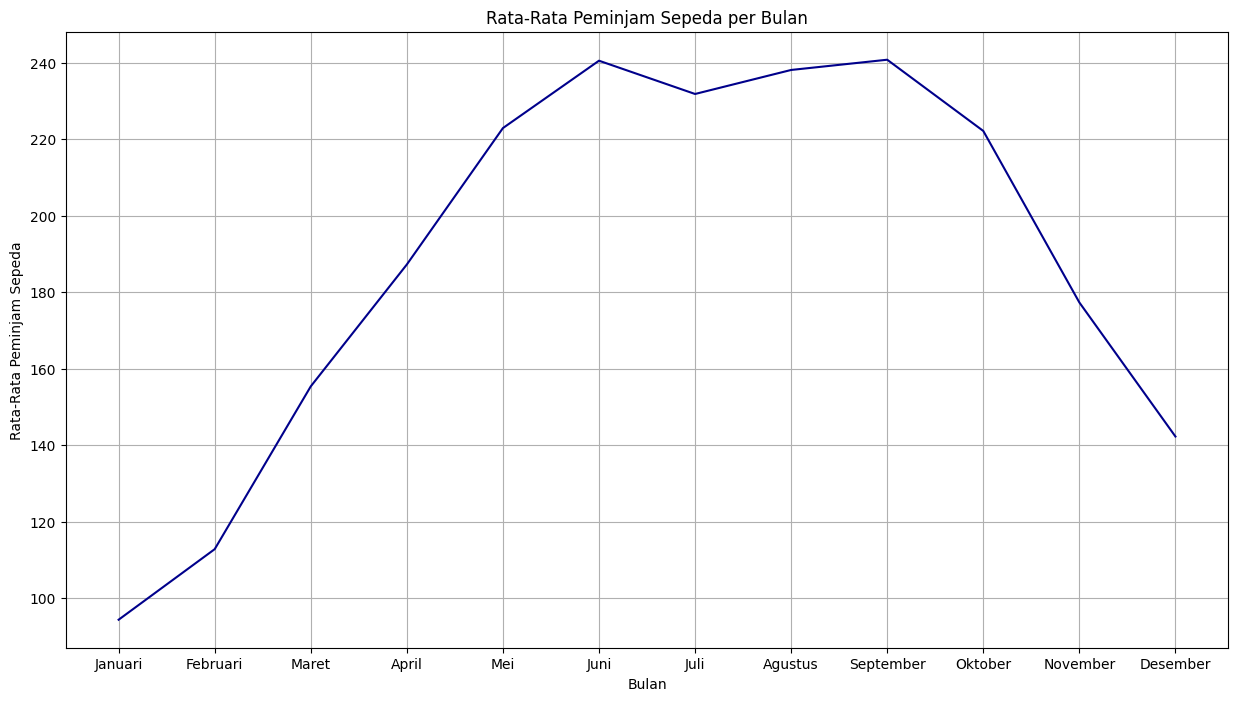

In [58]:
# Mengatur ukuran gambar
plt.figure(figsize=(15, 8))

# Memvisualisasikan total cnt berdasarkan bulan
plt.plot(bln.index, bln, color='darkblue')

# Memberi judul dan label sumbu
plt.title('Rata-Rata Peminjam Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Peminjam Sepeda')

# Mengatur label sumbu x berdasarkan bulan
bulan_labels = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
plt.xticks(bln.index, bulan_labels)

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()

### Pertanyaan 2:
Berapa persen perbandingan pengguna yang casual dengan yang terdaftar?

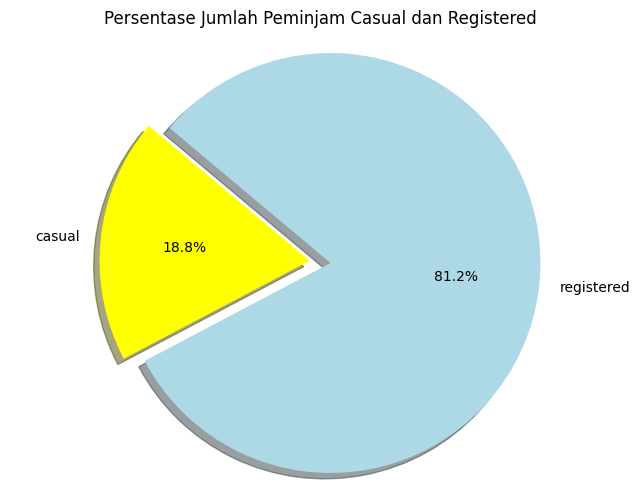

In [59]:

labels = ['casual', 'registered']
sizes = [total_casual, total_registered]
colors = ['yellow', 'lightblue']
explode = (0, 0.1)  # Menonjolkan bagian registered

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Pastikan pie chart berbentuk lingkaran
plt.title('Persentase Jumlah Peminjam Casual dan Registered')
plt.show()

### Pertanyaan 3:
Pada suhu berapa orang-orang banyak beraktivitas diluar?

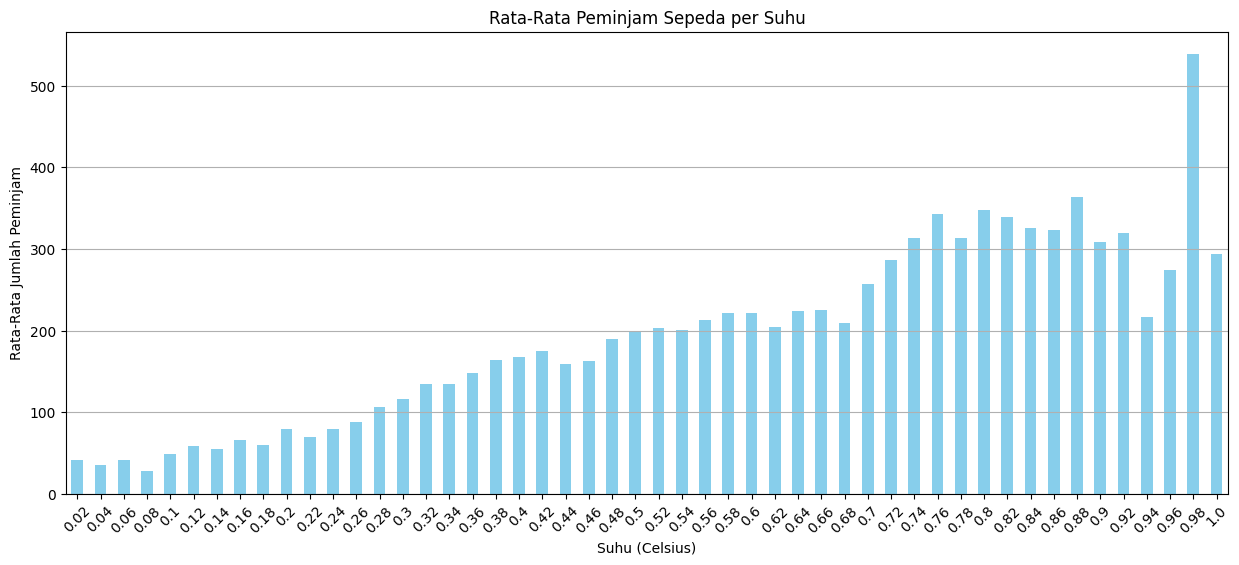

In [60]:
plt.figure(figsize=(15, 6))
temp_cnt.plot(kind='bar', color='skyblue')
plt.title('Rata-Rata Peminjam Sepeda per Suhu')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Rata-Rata Jumlah Peminjam')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Conclusion

**Pertanyaan 1**: Pada season dan bulan apa orang-orang paling banyak melakukan peminjaman?

**Conclusion**: Berdasarkan visualisasi yang didapatkan dapat dilihat bahwa peminjaman sepeda paling banyak dilakukan pada Bulan Juni dan September

**Pertanyaan 2**: Berapa persen perbandingan pengguna yang casual dengan yang terdaftar?

**Conclusion**: Berdasarkan visualisasi yang didapatkan dapat dilihat bahwa mayoritas peminjaman sepeda sudah melakukan regristrasi ke aplikasi mereka, yaitu sebanyak 81,2%. Sedangkan sisanya sebesar 18.8% peminjam, belum melakukan regristasi pada aplikasi yang disediakan

**Pertanyaan 3**: Pada suhu berapa orang-orang banyak beraktivitas diluar?

**Conclusion**: Berdasarkan visualisasi yang didapatkan dapat dilihat bahwa kebanyak orang beraktifitas di suhu 0.98°C. Kesimpulan ini didapat berdasarkan data suhu mengenai peminjaman sepeda yang paling banyak

In [62]:
hour_df.to_csv("dataku.csv", index=False)
